In [ ]:
# 네이버 이미지 갖고 오기
# - 셀레니움 가지고 이미지 크롤링 하기
# - 폴더 생성 / 기존폴더. 파일명에 따른 다른 이름 저장

In [1]:
# 필요한 모듈 갖고 오기
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup as bs
import time
import os # 파일 갖고 와야 되니까
from tqdm import tqdm
from urllib import request # 이미지 다운로드를 위해 필요한 모듈

In [2]:
browser = Chrome('C:/Users/kwoni/Desktop/pycode/chromedriver.exe')
time.sleep(1)

C:\Users\kwoni\AppData\Local\Temp\ipykernel_8876\2350673581.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = Chrome('C:/Users/kwoni/Desktop/pycode/chromedriver.exe')


In [4]:
# 준비 작업
# 키워드 입력 및 url 생성
kwrd=input('이미지 검색어 입력: ')


url = 'https://search.naver.com/search.naver?where=image&sm=tab_jum&query='
url = url + kwrd # url = url += kwrd

browser.get(url)

# 사용자가 요구한 스크롤 다운 횟수 확인하기
cntDn=int(input('스크롤 횟수 입력(최대 6): '))

if cntDn > 7:
    cntDn =7
cntDn

# windows.scrollTo(0,Height) : 스크롤을 아래로 이동
# Height 대신 document.body.scrollHeight를 입력하면 페이지의 끝으로 이동한다
for i in range(cntDn):
    browser.execute_script('window.scrollTo(0,document.body.scrollHeight)')
    time.sleep(1)

이미지 검색어 입력: 시노부
스크롤 횟수 입력(최대 6): 8


In [ ]:
# 화면에서 이미지 추출하기
# - 드라이브의 소스 코드 받아오기
# - 이미지가 있는 태그 찾기
# - 태그에서 이미지 소스('src') 받아오기
# - src 주소를 이용해여 이미지 다운로드 하기

In [5]:
# 드라이브 소스 코드 가져오기
html = browser.page_source
soup = bs(html,'html.parser')

In [6]:
# 이미지 대표 태그 찾기(find_all이니까 리스트 구조로 저장)
# image lazy src : 이미지만 불러오는 기능
tag_img = soup.find_all('div',class_='thumb')
tag_img[2].find('img')['src'] # 가장 첫번째 이미지의 이미지 소스 코드 뽑아온거
img=tag_img[4].find("img", class_="_image _listImage")
if img.get('data-lazy-src') == None: # data-lazy-src가 없으면 
    print(img['src'])
else:
    print(img.get('data-lazy-src'))

https://search.pstatic.net/common/?src=http%3A%2F%2Fcafefiles.naver.net%2FMjAyMDAzMDlfMjUx%2FMDAxNTgzNzQ5MzkwMDY5.olQe-AdAaJmjFi18wr8cYGz1qr5wUPWrw9mcB6rSSv4g.W5Hvub9Ecp__PN2oXpo6nqXP1fPdB2QmV0NVPK9xdzog.JPEG%2F77556768_p0_master1200.jpg&type=a340


In [7]:
# 태그에서 이미지 소스("src") 받아오기
tag_src=[]
for tag in tag_img:
    img=tag.find("img", class_="_image _listImage")
    if img.get("data-lazy-src") == None:
        tag_src.append(tag.find("img")['src'])
    else:
        tag_src.append(img.get("data-lazy-src"))
        
#tag_src=[tag.find("img")['src'] for tag in tag_img]
#print(len(tag_src))
browser.close()

In [8]:
# 이미지 src를 이용해 이미지 데이터 다운로드 후 저장하기
img_nm = 'C:/Users/kwoni/Desktop/pycode/data/' + kwrd +'.jpg'
#urllib.requests.urlretrieve (대상 url, '저장 경로와 파일명')
request.urlretrieve(tag_src[0],img_nm) # 웹 상의 이미지를 다운로드 후 저장

('C:/Users/kwoni/Desktop/pycode/data/시노부.jpg',
 <http.client.HTTPMessage at 0x1ee5f64afd0>)

In [ ]:
# 검색어를 이용해 폴더를 생성 후 전체 이미지 저장
# - os.mkdir('디렉토리 경로 / 생성 폴더명') => 디렉토리 생성 명령어
# - 폴더가 없으면 생성 후 저장
# - 기존에 폴더가 존재하면 해당 폴더 이름 뒤에 1,2 ...와 같이 번호를 부여하고 생성

In [10]:
# 폴더 생성
os.makedirs('C:/Users/kwoni/Desktop/pycode/data/imgs')
os.listdir('C:/Users/kwoni/Desktop/pycode/data/')

['images',
 'imgs',
 'Starbucks_gg.csv',
 'Starbucks_Seoul.csv',
 'subwayfree.csv',
 '스타벅스_전국.csv',
 '시노부.jpg',
 '지역_위치별(주유소) (1).xls',
 '지역_위치별(주유소) (2).xls',
 '지역_위치별(주유소).xls']

In [11]:
os.path.exists('C:/Users/kwoni/Desktop/pycode/data/') # 폴더, 파일 존재 여부 확인
# 있으면 ture, 없으면 false 출력

True

In [12]:
# 이미지를 저장할 대표 폴더를 생성(images)
fdir = 'C:/Users/kwoni/Desktop/pycode/data/images'

if os.path.exists(fdir): # 폴더가 있다면 뒤에 '/'만 붙여라
    fdir += '/'
else:
    os.makedirs(fdir) # 폴더가 없다면 폴더 생성 후 뒤에 '/' 붙여라
    fdir += '/'

#images 폴더에 검색 키워드를 이용해 폴더 생성 후 저장
# 키워드에 동일한 폴더가 있는 경우 뒤에 번호를 1씩 증가시키며 폴더명 확인
# 없으면 생성

if not os.path.exists(fdir + kwrd): 
    os.makedirs(fdir + kwrd) # 폴더가 없다면 폴더 생성 후 뒤에 '/' 붙여라
    fdir = fdir + kwrd + '/'
else: # 그 폴더가 있으면 새로운 폴더를 생성(번호를 증가시키는 방식으로)
    num = 0
    while True:
        num += 1 # 번호를 1씩 증가
        # 증가된 번호와 기존 폴더명을 연결해서 존재 여부 확인
        if not os.path.exists(fdir + kwrd + str(num)):
            os.makedirs(fdir + kwrd + str(num))#없으면 폴더 생성 후 while문 종료
            fdir = fdir + kwrd + str(num) +'/'
            break

In [13]:
# 이미지 저장하기
# - 저장 이미지 이름 뒤에 번호를 붙이기

num = 0
for tag in tqdm(tag_src):
    img_name = fdir + kwrd +str(num)+'.jpg'
    request.urlretrieve(tag,img_name) # 웹 상의 이미지를 다운로드 후 저장
    time.sleep(2)
    num += 1

print('===작업 끝===')



100%|████████████████████████████████████████████████████████████████████████████████| 532/532 [21:18<00:00,  2.40s/it]

===작업 끝===


In [17]:
# 구글에서 고양이 이미지 크롤링 하기
# - 스크롤바를 이용하여 검색한 기본 이미지를 폴더 생성 후 저장
browser = Chrome('C:/Users/kwoni/Desktop/pycode/chromedriver.exe')
time.sleep(1)

kwrd=input('이미지 검색어 입력: ')


url = 'https://www.google.com/search?q='
url = url + kwrd+'&tbm=isch&ved='+ kwrd# url = url += kwrd

browser.get(url)

# 사용자가 요구한 스크롤 다운 횟수 확인하기
cntDn=int(input('스크롤 횟수 입력(최대 6): '))

if cntDn > 6:
    cntDn =6
cntDn

# windows.scrollTo(0,Height) : 스크롤을 아래로 이동
# Height 대신 document.body.scrollHeight를 입력하면 페이지의 끝으로 이동한다
for i in range(cntDn):
    browser.execute_script('window.scrollTo(0,document.body.scrollHeight)')
    time.sleep(1)

C:\Users\kwoni\AppData\Local\Temp\ipykernel_8876\34278016.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = Chrome('C:/Users/kwoni/Desktop/pycode/chromedriver.exe')


이미지 검색어 입력: 고양이
스크롤 횟수 입력(최대 6): 8




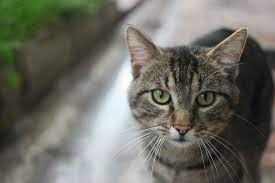

In [18]:
# 드라이브 소스 코드 가져오기
html = browser.page_source
soup = bs(html,'html.parser')

tag_img = soup.find_all('div',class_='bRMDJf islir')
tag_img[0].find('img')['src'] # 가장 첫번째 이미지의 이미지 소스 코드 뽑아온거
img = tag_img[0].find('img',class_='rg_i Q4LuWd')

if img.get('data-lazy-src') == None: # data-lazy-src가 없으면 
    print(img['src'])
else:
    print(img.get('data-lazy-src'))

In [23]:
# 태그에서 이미지 소스("src") 받아오기
tag_src=[]
for tag in tag_img:
    img=tag.find("img", class_='rg_i Q4LuWd')
    if img.get("data-lazy-src") == None:
        tag_src.append(tag.find("img")['src'])
    else:
        tag_src.append(img.get("data-lazy-src"))
        
#tag_src=[tag.find("img")['src'] for tag in tag_img]
#print(len(tag_src))
browser.close()

KeyError: 'src'

In [ ]:
img_nm = 'C:/Users/kwoni/Desktop/pycode/data/' + kwrd +'.jpg'